In [ ]:
pip install tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(mnist_dataset)

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>


In [ ]:
x_train = x_train.astype(np.float32) / 255.0
x_test  = x_test.astype(np.float32) / 255.0

In [ ]:
y_train = y_train.astype(np.int32)
y_test  = y_test.astype(np.int32)


In [ ]:
x_train = x_train.reshape(-1,784,1)
x_test = x_test.reshape(-1,784,1)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.batch(64)
test_dataset = test_dataset.batch(64)


In [ ]:
softmax_model = keras.models.Sequential([
    tf.keras.layers.Input(shape=(784, 1)),
    tf.keras.layers.Flatten(),
    #keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

In [ ]:
softmax_model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [ ]:
epoch = 20
for trial in range(epoch):
  softmax_model.fit(train_dataset)
  loss_function.append()


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6405 - loss: 1.3840
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8572 - loss: 0.5864
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8761 - loss: 0.4859
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8841 - loss: 0.4405
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8890 - loss: 0.4134
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8931 - loss: 0.3948
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.3811
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8984 - loss: 0.3705
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9007 - loss: 0.3619
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9024 - loss: 0.3547
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9040 - loss: 0.3487
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9053 - loss: 0.3435
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 0.3389
938/938 ━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_acc = softmax_model.evaluate(test_dataset)
print(f"Test Accuracy is {test_acc}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9039 - loss: 0.3494
Test Accuracy is 0.9168000221252441


In [ ]:
image_predictions = softmax_model.predict(test_dataset)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
test_photos = x_test.reshape(-1, 28, 28)

In [ ]:
prediction = image_predictions.argmax(axis = 1)

In [ ]:
def show_picture(photos, index):
  photo = photos[index];
  correct = y_test[index]
  guess = prediction[index]
  plt.imshow(photo)
  plt.title(f"Correct: {correct}, Guess: {guess}")
  plt.show()

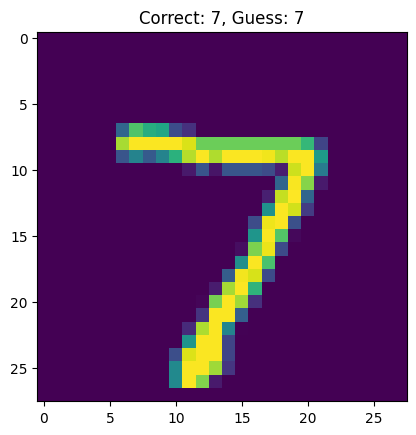

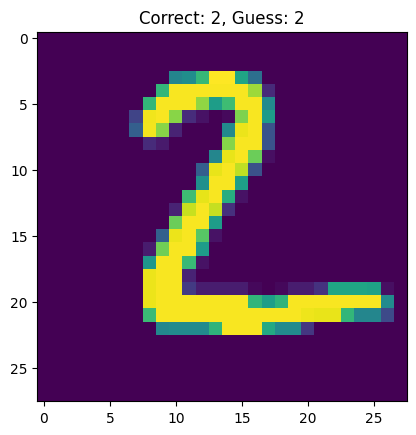

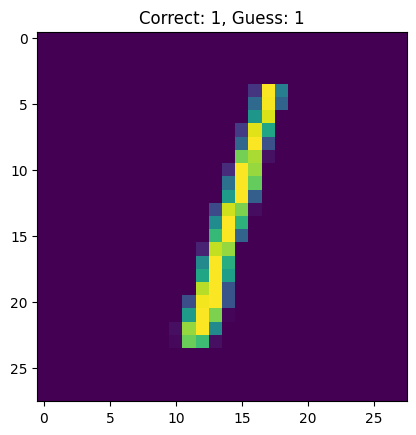

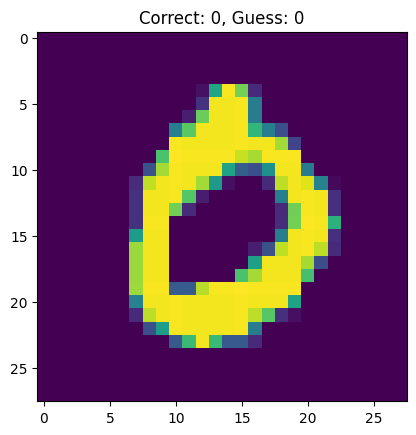

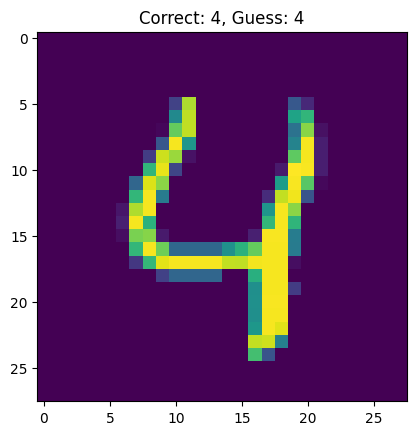

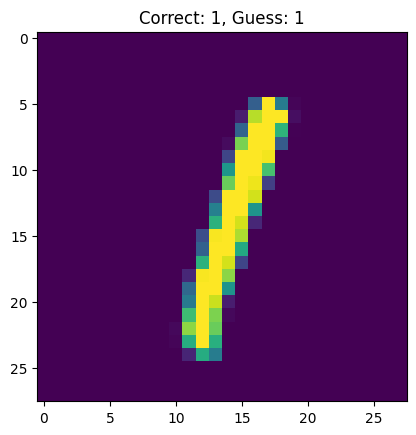

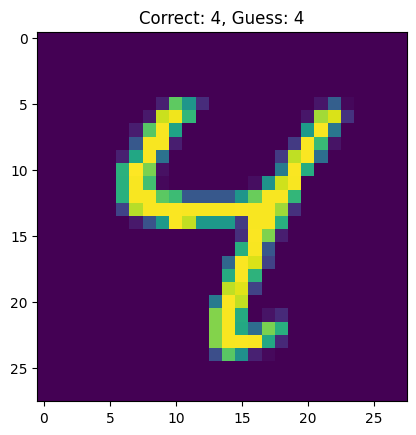

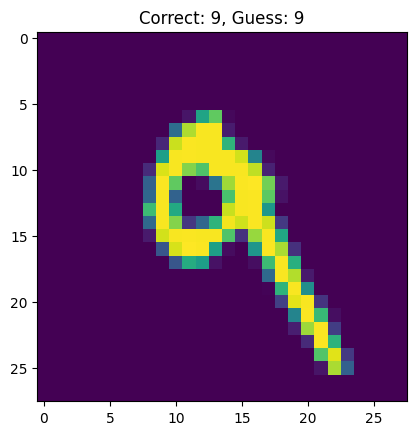

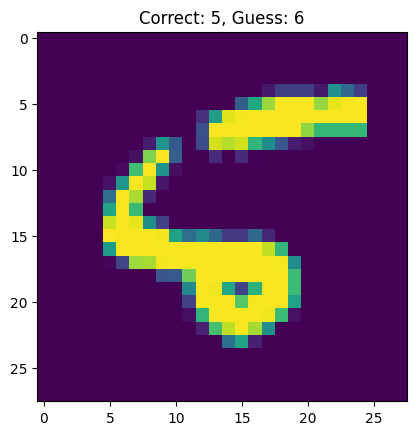

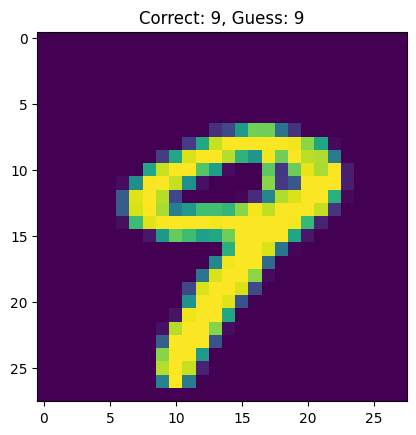

In [ ]:
for i in range(10):
  show_picture(test_photos,i)